In [408]:
import math 
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import sympy as sp
import pandas as pd
from scipy.optimize import fsolve
from IPython.display import *

In [114]:
def qbeta(p,shape1,shape2):
    """
    Calculates the cumulative of the Beta-distribution
    """
    from scipy.stats import beta
    result=beta.ppf(q=p,a=shape1,b=shape2,loc=0,scale=1)
    return result

def qnorm(p,mean=0,sd=1):
    """
    Calculates the quantile function of the normal distribution
    """
    from scipy.stats import norm
    result=norm.ppf(q=p,loc=mean,scale=sd)
    return result

def qbinom(p, size, prob=0.5):
    """
    Calculates the quantile function from the binomial distribution
    """
    from scipy.stats import binom
    result=binom.ppf(q=p,n=size,p=prob,loc=0)
    return result

def dbinom(x,size,prob=0.5):
    """
    Calculates the point estimate of the binomial distribution
    """
    from scipy.stats import binom
    result=binom.pmf(k=x,n=size,p=prob,loc=0)
    return result


## Интервальные оценки для параметра биноминального закона

### Задание

Используя выборку, сгенерированную вами в задаче 2 и считая параметр p неизвестным (k - дано), постройте для уровней доверия 
$ 1 -\alpha $ = 0.9, 0.95 и 0.98 симметричные интервальные оценки Клоппера-Пирсона $(\underline{p} ;\overline{p})$  для вероятности успеха в одном испытании p.

Для тех же уровней найдите по ЦПТ приближенные доверительные интервалы для p.

Сравните полученные результаты и убедитесь, что полученные интервалы содержат истинное значение параметра.

Для одного из значений $\alpha$ постройте совмещенные графики функций распределения биномиальных законов $B(k,p) , B(k,\underline{p}) , B(k,\overline{p})$

### Исходные данные

n = 200,    k=8

In [569]:
n=200
k=8
vyborka = [5, 5, 5, 6, 2, 5, 2, 3, 6, 6, 3, 4, 6, 2, 5, 4, 4, 4, 5, 2, 5, 4, 2, 5, 4, 4, 3, 4, 4, 6, 8, 4, 1, 2, 3, 3, 4, 2, 3, 3, 3, 4, 6, 1, 4, 3, 2, 6, 5, 4, 4, 4, 4, 4, 5, 4, 3, 7, 4, 6, 5, 2, 6, 2, 3, 4, 5, 5, 3, 3, 7, 5, 4, 2, 6, 3, 1, 5, 4, 7, 3, 2, 4, 2, 3, 4, 3, 5, 2, 0, 3, 6, 4, 4, 4, 4, 5, 2, 4, 5, 4, 3, 3, 5, 3, 5, 7, 4, 2, 5, 3, 1, 3, 5, 5, 2, 2, 6, 2, 4, 5, 4, 4, 6, 4, 4, 4, 3, 4, 3, 2, 3, 5, 4, 2, 4, 3, 4, 5, 4, 2, 5, 4, 2, 5, 2, 4, 3, 5, 4, 4, 3, 4, 3, 4, 6, 5, 5, 5, 4, 5, 4, 5, 2, 3, 6, 4, 4, 6, 0, 5, 4, 6, 4, 5, 4, 5, 5, 6, 4, 5, 4, 3, 3, 4, 3, 6, 4, 2, 2, 6, 4, 2, 6, 4, 5, 3, 4, 5, 5]

print("Выборка: \n")
print(np.reshape(vyborka,(10,20)))

Выборка: 

[[5 5 5 6 2 5 2 3 6 6 3 4 6 2 5 4 4 4 5 2]
 [5 4 2 5 4 4 3 4 4 6 8 4 1 2 3 3 4 2 3 3]
 [3 4 6 1 4 3 2 6 5 4 4 4 4 4 5 4 3 7 4 6]
 [5 2 6 2 3 4 5 5 3 3 7 5 4 2 6 3 1 5 4 7]
 [3 2 4 2 3 4 3 5 2 0 3 6 4 4 4 4 5 2 4 5]
 [4 3 3 5 3 5 7 4 2 5 3 1 3 5 5 2 2 6 2 4]
 [5 4 4 6 4 4 4 3 4 3 2 3 5 4 2 4 3 4 5 4]
 [2 5 4 2 5 2 4 3 5 4 4 3 4 3 4 6 5 5 5 4]
 [5 4 5 2 3 6 4 4 6 0 5 4 6 4 5 4 5 5 6 4]
 [5 4 3 3 4 3 6 4 2 2 6 4 2 6 4 5 3 4 5 5]]


In [112]:
K=0
for i in vyborka:
    K+=i
print("Сумма элементов выборки:")
print('K =',K)

Сумма элементов выборки:
K = 789


#### Построение Т($ \theta $) (ЦПТ):

In [161]:
T_theta=lambda theta: (K-(n*k*theta))/(n*k*theta*(1-theta))**(1/2)
qn=qnorm(0.95)

display(Math(r' T(\theta) = \frac{K - k*n*\theta}{\sqrt{k*n*\theta*(1-\theta)}} '))

<IPython.core.display.Math object>

<ipython-input-161-2cdc95a08fad>:1: RuntimeWarning: divide by zero encountered in true_divide
  T_theta=lambda theta: (K-(n*k*theta))/(n*k*theta*(1-theta))**(1/2)


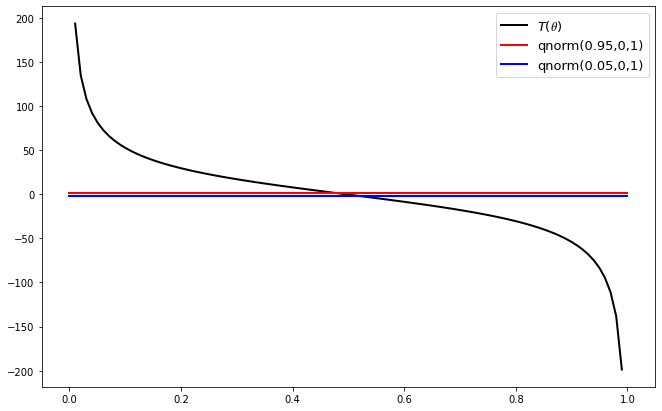

In [388]:
x=np.linspace(0,1,100)
plt.figure(figsize=(11,7))
plt.plot(x,T_theta(x),'k',linewidth = 2,label = '$ T(𝜃) $')
plt.plot(x,[qn for i in x],'r',linewidth = 2, label = 'qnorm(0.95,0,1)')
plt.plot(x,[-qn for i in x],'b',linewidth = 2, label = 'qnorm(0.05,0,1)')
plt.legend(fontsize = 13 )

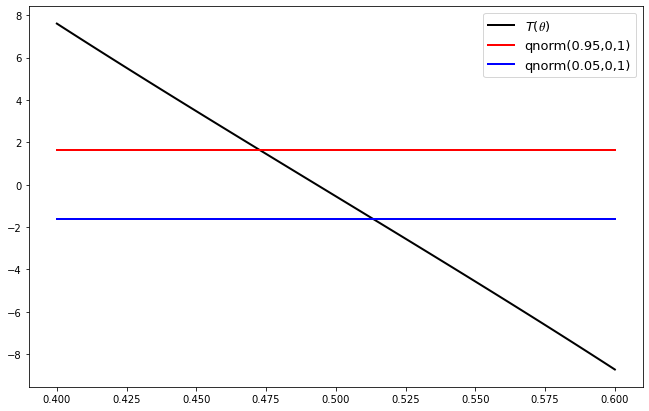

In [356]:
x=np.linspace(0.4,0.6,100)
plt.figure(figsize=(11,7))
plt.plot(x,T_theta(x),'k',linewidth = 2,label = '$ T(𝜃) $')
plt.plot(x,[qn for i in x],'r',linewidth = 2, label = 'qnorm(0.95,0,1)')
plt.plot(x,[-qn for i in x],'b',linewidth = 2, label = 'qnorm(0.05,0,1)')
plt.legend(fontsize = 13 )

### Поиск приближенных доверительных интервалов по ЦПТ

Нижняя граница: $root(T(\theta) = qnorm(1-\frac{\alpha}{2},0,1)) $

Верхняя граница: $root(T(\theta) = - qnorm(1-\frac{\alpha}{2},0,1)) $

In [537]:
func1=lambda theta,alfa : T_theta(theta) - qnorm(1-(alfa/2),0,1)
func2=lambda theta,alfa : T_theta(theta) + qnorm(1-(alfa/2),0,1)

p11_01 = sp.solve(sp.Eq(func1(theta,0.1),0))[0]
p12_01 = sp.solve(sp.Eq(func2(theta,0.1)))[0]
print("Для 𝛼 = 0.1")
print(" Нижняя граница:",round(p11_01,6),'\n',"Верхняя граница:",round(p12_01,5))
print()

p11_005 = sp.solve(sp.Eq(func1(theta,0.05)))[0]
p12_005 = sp.solve(sp.Eq(func2(theta,0.05)))[0]
print("Для 𝛼 = 0.05")
print(" Нижняя граница:",round(p11_005,6),'\n',"Верхняя граница:",round(p12_005,5))
print()

p11_002 = sp.solve(sp.Eq(func1(theta,0.02)))[0]
p12_002 = sp.solve(sp.Eq(func2(theta,0.02)))[0]
print("Для 𝛼 = 0.02")
print(" Нижняя граница:",round(p11_002,6),'\n',"Верхняя граница:",round(p12_002,5))
print()

Для 𝛼 = 0.1
 Нижняя граница: 0.472595 
 Верхняя граница: 0.51368

Для 𝛼 = 0.05
 Нижняя граница: 0.468674 
 Верхняя граница: 0.51761

Для 𝛼 = 0.02
 Нижняя граница: 0.464121 
 Верхняя граница: 0.52218



### Поиск доверительных интервалов через обратную бета-функцию:

Нижняя граница: $ qbeta(\frac{\alpha}{2},K,n*k-K + 1) $

Верхняя граница: $ qbeta(\frac{\alpha}{2},K + 1,n*k-K) $

In [305]:
p21_01=qbeta(0.1/2,K,n*k-K + 1)
p22_01=qbeta(1-(0.1/2),K+1,n*k-K)
print("Для 𝛼 = 0.1")
print(" Нижняя граница:",round(p21_01,6),'\n',"Верхняя граница:",round(p22_01,5))
print()

p21_005=qbeta(0.05/2,K,n*k-K + 1)
p22_005=qbeta(1-(0.05/2),K+1,n*k-K)
print("Для 𝛼 = 0.05")
print(" Нижняя граница:",round(p21_005,6),'\n',"Верхняя граница:",round(p22_005,5))
print()

p21_002=qbeta(0.02/2,K,n*k-K + 1)
p22_002=qbeta(1-(0.02/2),K+1,n*k-K)
print("Для 𝛼 = 0.02")
print(" Нижняя граница:",round(p21_002,6),'\n',"Верхняя граница:",round(p22_002,6))
print()

Для 𝛼 = 0.1
 Нижняя граница: 0.472275 
 Верхняя граница: 0.51399

Для 𝛼 = 0.05
 Нижняя граница: 0.468347 
 Верхняя граница: 0.51793

Для 𝛼 = 0.02
 Нижняя граница: 0.463783 
 Верхняя граница: 0.522501



#### Квантиль уровня $ \frac{\alpha}{2}:C_1(\theta,\alpha) = qbinom(\frac{\alpha}{2},kn,\theta)$

#### Квантиль уровня $ 1-\frac{\alpha}{2}: C_2(\theta,\alpha) = qbinom(1-\frac{\alpha}{2},kn,\theta)$

### Графики квантилей для различных уровней доверия:

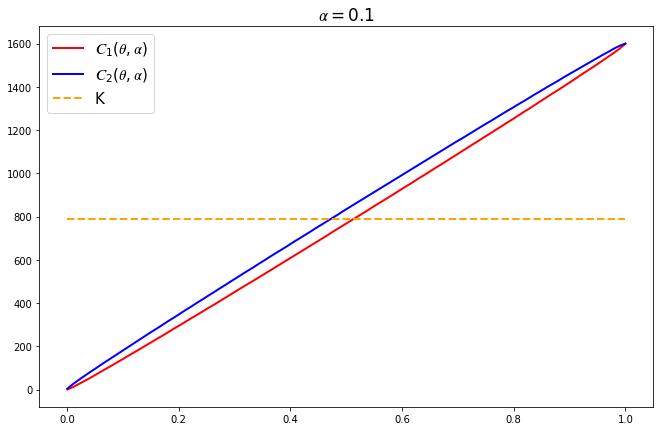

In [382]:
alfa=0.1
C1=lambda theta,alfa:qbinom(alfa/2,k*n,theta)
C2=lambda theta,alfa:qbinom(1-alfa/2,k*n,theta)


x=np.linspace(0.001,0.9999,100)
plt.figure(figsize=(11,7))
plt.plot(x,C1(x,alfa),'r',linewidth = 2,label = '$ 𝐶_1(𝜃,𝛼) $')
plt.plot(x,C2(x,alfa),'b',linewidth = 2,label = '$ 𝐶_2(𝜃,𝛼) $')
plt.plot(x,[K for i in range(100)],'--',color='orange',linewidth = 2,label = 'K')
plt.title('$ 𝛼 = 0.1 $',fontsize = 17)
plt.legend(fontsize = 15)

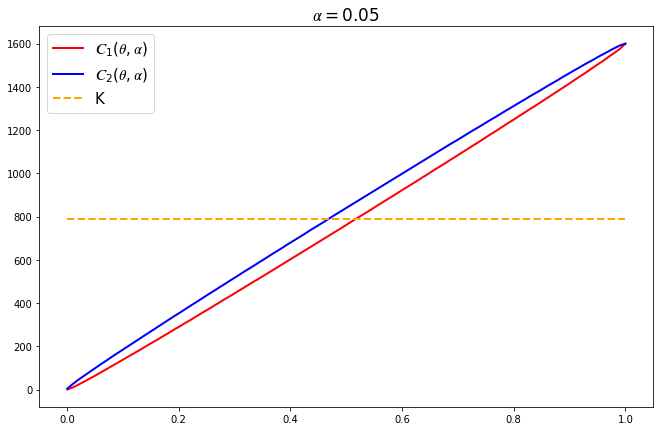

In [381]:
alfa=0.05

x=np.linspace(0.001,0.9999,100)
plt.figure(figsize=(11,7))
plt.plot(x,C1(x,alfa),'r',linewidth = 2,label = '$ 𝐶_1(𝜃,𝛼) $')
plt.plot(x,C2(x,alfa),'b',linewidth = 2,label = '$ 𝐶_2(𝜃,𝛼) $')
plt.plot(x,[K for i in range(100)],'--',color='orange',linewidth = 2,label = 'K')
plt.title('$ 𝛼 = 0.05 $',fontsize = 17)
plt.legend(fontsize = 15)

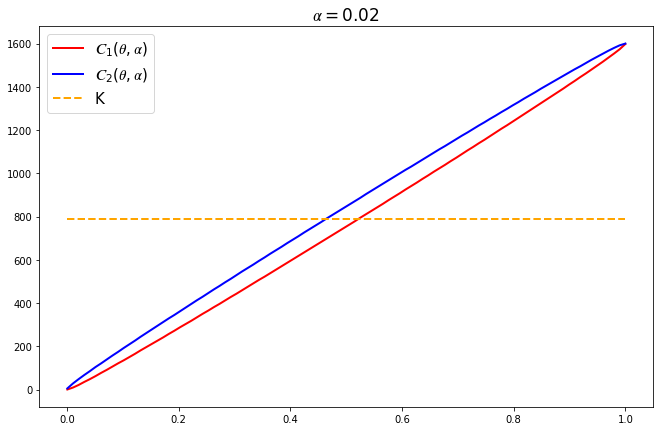

In [457]:
alfa=0.02

x=np.linspace(0.001,0.9999,100)
plt.figure(figsize=(11,7))
plt.plot(x,C1(x,alfa),'r',linewidth = 2,label = '$ 𝐶_1(𝜃,𝛼) $')
plt.plot(x,C2(x,alfa),'b',linewidth = 2,label = '$ 𝐶_2(𝜃,𝛼) $')
plt.plot(x,[K for i in range(100)],'--',color='orange',linewidth = 2,label = 'K')
plt.title('$ 𝛼 = 0.02 $',fontsize = 17)
plt.legend(fontsize = 15)

### Границы для различных уровней доверия (прибл.решение)

Нижняя граница : $ 𝐶_1(𝜃,𝛼) = K $

Верхняя граница : $ 𝐶_2(𝜃,𝛼) = K $

In [384]:
func3=lambda theta,alfa: qbinom(1-alfa/2,k*n,theta)-K
func4=lambda theta,alfa: qbinom(alfa/2,k*n,theta)-K

p31_01=fsolve(func3,0.0001,0.1)[0]
p32_01=fsolve(func4,0.0001,0.1)[0]
print("Для 𝛼 = 0.1")
print(" Нижняя граница:",round(p31_01,6),'\n',"Верхняя граница:",round(p32_01,5))
print()

p31_005=fsolve(func3,0.0001,0.05)[0]
p32_005=fsolve(func4,0.0001,0.05)[0]
print("Для 𝛼 = 0.05")
print(" Нижняя граница:",round(p31_005,6),'\n',"Верхняя граница:",round(p32_005,5))
print()

p31_002=fsolve(func3,0.0001,0.02)[0]
p32_002=fsolve(func4,0.0001,0.02)[0]
print("Для 𝛼 = 0.02")
print(" Нижняя граница:",round(p31_002,6),'\n',"Верхняя граница:",round(p32_002,5))
print()


Для 𝛼 = 0.1
 Нижняя граница: 0.472728 
 Верхняя граница: 0.51373

Для 𝛼 = 0.05
 Нижняя граница: 0.468496 
 Верхняя граница: 0.51778

Для 𝛼 = 0.02
 Нижняя граница: 0.464134 
 Верхняя граница: 0.52212



### Cравнение разных способов решения 

In [442]:
df

,𝛼 = 0.1,𝛼 = 0.05,𝛼 = 0.02
ЦПТ,(0.473; 0.514),(0.469; 0.518),(0.464; 0.522)
Бетта ф-я,(0.472; 0.514),(0.468; 0.518),(0.464; 0.523)
приб.реш,(0.473; 0.514),(0.468; 0.518),(0.464; 0.522)


### Совмещенные графики функции распределения биномиальных законов для $\alpha = 0.1$

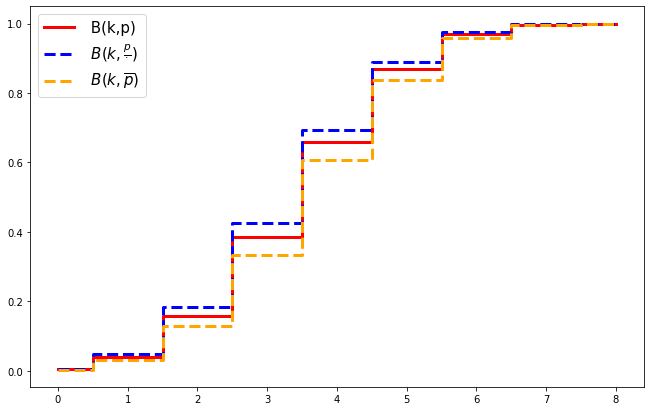

In [561]:
def B(p):
    sum=0
    b=[]
    for i in range(k+1):
        sum+=dbinom(i,k,p)
        b.append(sum)
    return b


plt.figure(figsize=(11,7))
plt.step(range(k+1),B(0.49),'r',where='mid',linewidth = 3,label = " B(k,p) ")
plt.step(range(k+1),B(p31_01),'--',color='b',where='mid',linewidth = 3, label = r' $B(k, \frac{p}{.}  )$ ' )
plt.step(range(k+1),B(p32_01),'--',color='orange',where='mid',linewidth = 3,label = r' $ B(k, \overline{p} ) $ ')
plt.legend(fontsize = 15)

#### Вывод: все методы интервальной оценки подходят, во всех интервалах содержится истинное значение p=0.5 для различных уровней доверия. Полученные интервалы практически идентичны.

In [448]:
dt = np.array([['(' + str(round(p11_01 ,3)) + "; " + str(round(p12_01 ,3)) + ")",
                '(' + str(round(p11_005,3)) + "; " + str(round(p12_005,3)) + ")",
                '(' + str(round(p11_002,3)) + "; " + str(round(p12_002,3)) + ")"],
               ['(' + str(round(p21_01 ,3)) + "; " + str(round(p22_01 ,3)) + ")",
                '(' + str(round(p21_005,3)) + "; " + str(round(p22_005,3)) + ")",
                '(' + str(round(p21_002,3)) + "; " + str(round(p22_002,3)) + ")"],
               ['(' + str(round(p31_01 ,3)) + "; " + str(round(p32_01 ,3)) + ")",
                '(' + str(round(p31_005,3)) + "; " + str(round(p32_005,3)) + ")",
                '(' + str(round(p31_002,3)) + "; " + str(round(p32_002,3)) + ")"]])

row = np.array(["ЦПТ","Бетта ф-я","приб.реш"])
col = np.array(["𝛼 = 0.1","𝛼 = 0.05","𝛼 = 0.02"])

df = pd.DataFrame(dt, index = row , columns = col)
df = df.style.set_properties(**{'font-size': '12pt',})